In [37]:
import psycopg2
import psycopg2.extras

hostname='localhost'
database='qureaidb'
username ='postgres'
pwd = '12345678'
port_id = 5432


fetch_data1 = '''with cte as(select daydatetime, 
	sum(coalesce(total_mobolity,0)) as total_mobolity, sum(coalesce(deaths,0)) as deaths
    from survey."Fact_Covid_report" 
    group by daydatetime,county_name),
    cte1 as(select daydatetime, total_mobolity,
    lead(deaths,0,0) over(order by daydatetime asc) as deaths
    from cte)
    select daydatetime, total_mobolity,deaths
    from cte1
    order by daydatetime,total_mobolity'''
fetch_data='''select * from survey."Fact_Covid_report"'''

In [38]:
try:
    with psycopg2.connect(
                host = hostname,
                dbname = database,
                user = username,
                password = pwd,
                port = port_id) as conn:

        with conn.cursor(cursor_factory=psycopg2.extras.DictCursor) as cur:
            cur.execute(fetch_data)
            covid_data=cur.fetchall()
            # for record in covid_data:
            #     print(record['daydatetime'], record['transit_stations_mobility'], record['deaths'])
except Exception as error:
    print(error)
finally:
    if conn is not None:
        conn.close()

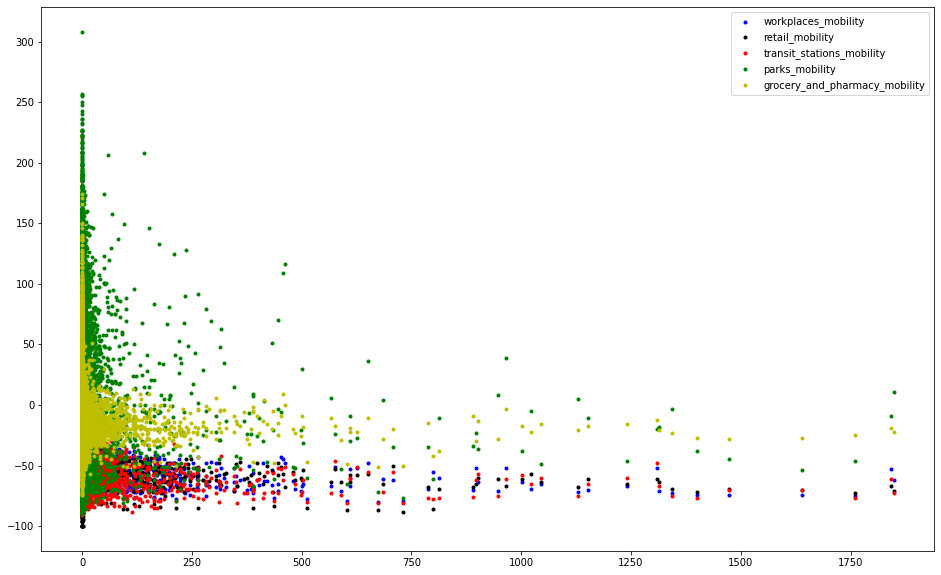

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# for a in covid_data['transit_stations_mobility']:
#     print(np.dtype(a))
    # if(dtype(a)!)
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)

y = np.array([x['workplaces_mobility'] for x in covid_data])
y1 = np.array([x['retail_mobility'] for x in covid_data])
y2 = np.array([x['transit_stations_mobility'] for x in covid_data])
y3 = np.array([x['parks_mobility'] for x in covid_data])
y4 = np.array([x['grocery_and_pharmacy_mobility'] for x in covid_data])

x = np.array([x['deaths'] for x in covid_data])    # This is already vectorized, that is, y will be a vector!
plt.scatter(x, y, marker='.',color='blue',label='workplaces_mobility')
plt.scatter(x, y1, marker='.', color='black',label='retail_mobility')
plt.scatter(x, y2, marker='.', color='red',label='transit_stations_mobility')
plt.scatter(x, y3, marker='.', color='green',label='parks_mobility')
plt.scatter(x, y4, marker='.',color='y',label='grocery_and_pharmacy_mobility')

plt.legend(numpoints=1)

# plt.plot(x, y)
# plt.show()